# Homework

Considere el siguiente areglo que contiene la altura de un grupo de estudiantes de Henry:

```python
muestra = np.array( [[1.85, 1.8, 1.8 , 1.8],
                    [1.73,  1.7, 1.75, 1.76],
                    [ 1.65, 1.69,  1.67 ,  1.6],
                    [1.54,  1.57, 1.58, 1.59],
                    [ 1.4 , 1.42,  1.45, 1.48]]) 
```

1) Calcule

- Media.
- Mediana.
- Moda
- Varianza
- Desvío estándar.

2) Convierta el arreglo en una lista y realice un Histograma de 5 intervalos. ¿Tiene distribución normal?.

3) Con los siguientes datos construye un df y un array que permitan describir adecuadamente la muestra.
    'Ingreso en miles' : 10.5 6.8 20.7 18.2 8.6 25.8 22.2 5.9 7.6 11.8
    'Años de estudio': 17 18 21 16 16 21 16 14 18 18

4) Utilizando pandas describa el dataframe.

5) Realice un histograma para de 6 secciones para 'Ingreso en miles' y 'Años de estudio'.

6) Calcula la media de 'Ingreso en miles' (df) utilizando pandas.

7) Calcula la media de 'Ingreso en miles' (array) utilizando numpy.

8) Agregue los siguientes valores extremos al df \[ 50, 35 \], \[ 120, 30 \]. ¿En cuanto vario la media?, ¿Qué conclusiones obtiene de este resultado sobre la media?.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
muestra = np.array( [[1.85, 1.8, 1.8 , 1.8],
                    [1.73,  1.7, 1.75, 1.76],
                    [ 1.65, 1.69,  1.67 ,  1.6],
                    [1.54,  1.57, 1.58, 1.59],
                    [ 1.4 , 1.42,  1.45, 1.48]]) 

1) Calcule

- Media.
- Mediana.
- Moda
- Varianza
- Desvío estándar.

In [9]:
prueba = np.array([[1,2,3]])
prueba.sum()
sum(prueba)


array([1, 2, 3])

In [58]:
### MEDIA ARITMETICA ###

def media_aritmetica(lista):
    if (lista.ndim > 1):
        lista = lista.flatten()
        total = sum(lista)
        return total/len(lista)
    else:
        total = sum(lista)
        return total/len(lista)

In [11]:
print(media_aritmetica(muestra))
print(np.mean(muestra))

1.6415
1.6415


In [7]:
### MEDIA GEOMETRICA ###

def media_geometrica(lista):
    radicando = 1
    if (lista.ndim > 1):
        lista = lista.flatten()
        for i in range(len(lista)):
            radicando *= lista[i] 
        return radicando ** (1/len(lista))
    else:
        for i in range(len(lista)):
            radicando *= lista[i] 
        return radicando ** (1/len(lista))

In [8]:
print(media_geometrica(muestra))

1.6360182292940844


In [9]:
### MEDIANA ###

def mediana(lista):
    lista = lista.flatten() # aplano el array
    lista = np.sort(lista)
    n = len(lista)
    if (n % 2 == 1): # cant de datos IMPAR
        posicion = (n+1)/2
        return lista[posicion]
    else:
        posicion1 = (n // 2) - 1    # recordemos que las listas arrancan desde 0, por eso hay que restarle una unidad
        posicion2 = posicion1 + 1
    return (lista[posicion1] + lista[posicion2]) / 2

In [10]:
print(mediana(muestra))
print(np.median(muestra))


1.66
1.66


In [56]:
### MODA ###

def moda(arr):
    
    # debemos buscar el/los valores que mas se repiten
    lista = list(arr.flatten())

    unicos = list(set(lista))
    max ,  moda = 0 , 0

    for indice, num in enumerate(unicos):
        conteo = lista.count(num)
        if (conteo > max):
            max = conteo
            moda = unicos[indice]
    return moda

def obtenerModa(arreglo):
   numeros = [numero for fila in arreglo for numero in fila] #Paso la matriz a una lista
   unicos = list(set(numeros)) #Obtengo valores únicos
   moda, maximo = 0,0
   for indice, numero in enumerate(unicos):
      conteo = numeros.count(numero) #Busco la mayor repetición de ese valor
      if conteo > maximo:
         maximo = conteo
         moda = unicos[indice]
   return moda



In [55]:
obtenerModa(muestra)

1.8

In [57]:
moda (muestra)

1.8

In [65]:
### VARIANZA ###

def varianza(arr):
    lista = list(arr.flatten())
    suma_cuadrada = 0
    for xi in lista:
        suma_cuadrada += (xi - media_aritmetica(arr))**2
    return suma_cuadrada/len(lista)

In [64]:
print(varianza(muestra))
print(np.var(muestra))

0.017642750000000006
0.017642750000000006


In [66]:
### DESVIACION ESTANDAR ###

def desv_std(arr):
    return varianza(arr)**0.5

In [67]:
print(desv_std(muestra))
print(np.std(muestra))

0.13282601401833907
0.13282601401833907


2) Convierta el arreglo en una lista y realice un Histograma de 5 intervalos. ¿Tiene distribución normal?.


In [11]:
aplanado = muestra.flatten()
aplanado

array([1.85, 1.8 , 1.8 , 1.8 , 1.73, 1.7 , 1.75, 1.76, 1.65, 1.69, 1.67,
       1.6 , 1.54, 1.57, 1.58, 1.59, 1.4 , 1.42, 1.45, 1.48])

In [12]:
lista = list(aplanado)
lista.sort()
print (lista)
print (type(lista))

[1.4, 1.42, 1.45, 1.48, 1.54, 1.57, 1.58, 1.59, 1.6, 1.65, 1.67, 1.69, 1.7, 1.73, 1.75, 1.76, 1.8, 1.8, 1.8, 1.85]
<class 'list'>


Text(0, 0.5, 'Frecuencias Absolutas')

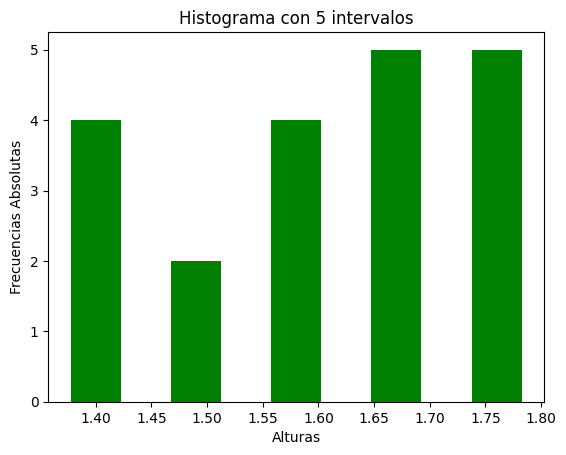

In [28]:
plt.hist(lista, bins=5, rwidth=0.5, color='green')
plt.title("Histograma con 5 intervalos")
plt.xlabel("Alturas")
plt.ylabel("Frecuencias Absolutas")

3) Con los siguientes datos construye un df y un array que permitan describir adecuadamente la muestra.
    'Ingreso en miles' : 10.5 6.8 20.7 18.2 8.6 25.8 22.2 5.9 7.6 11.8
    'Años de estudio': 17 18 21 16 16 21 16 14 18 18


In [182]:
df = pd.DataFrame({
    'Ingreso en miles': [10.5, 6.8, 20.7, 18.2, 8.6, 25.8, 22.2, 5.9, 7.6, 11.8],
    'Años de estudio': [17, 18, 21, 16, 16, 21, 16, 14, 18, 18]
})
df

,Ingreso en miles,Años de estudio
0,10.5,17
1,6.8,18
2,20.7,21
3,18.2,16
4,8.6,16
5,25.8,21
6,22.2,16
7,5.9,14
8,7.6,18
9,11.8,18


4) Utilizando pandas describa el dataframe.

In [169]:
f"El promedio de años de estudio es de : {np.mean(df['Años de estudio'])}"

'El promedio de años de estudio es de : 17.5'

In [170]:
f"El promedio de ingresos es de : {np.mean(df['Ingreso en miles']*1000)} pesos argentinos"

'El promedio de ingresos es de : 13810.0 pesos argentinos'

In [171]:
query1 = df['Años de estudio'].loc[df['Ingreso en miles'] == df['Ingreso en miles'].max()].values

print(f'La cantidad de años de estudio que le tomo a la persona que tiene el mayor de los ingresos fue de: {int(query1)} años')

La cantidad de años de estudio que le tomo a la persona que tiene el mayor de los ingresos fue de: 21 años


5) Realice un histograma para de 6 secciones para 'Ingreso en miles' y 'Años de estudio'.

(array([1., 3., 1., 3., 0., 2.]),
 array([14.        , 15.16666667, 16.33333333, 17.5       , 18.66666667,
        19.83333333, 21.        ]),
 <BarContainer object of 6 artists>)

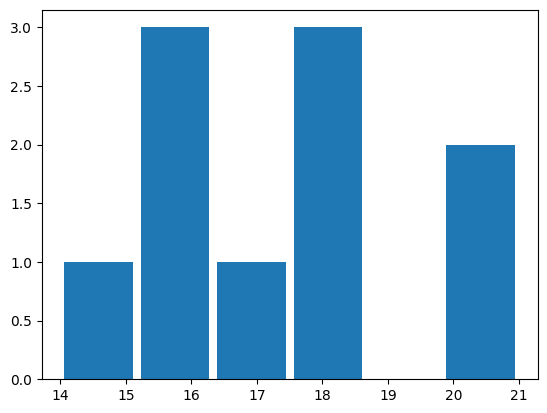

In [172]:
plt.hist(df['Años de estudio'], bins=6, rwidth=0.9)

(array([4., 2., 0., 1., 2., 1.]),
 array([ 5.9       ,  9.21666667, 12.53333333, 15.85      , 19.16666667,
        22.48333333, 25.8       ]),
 <BarContainer object of 6 artists>)

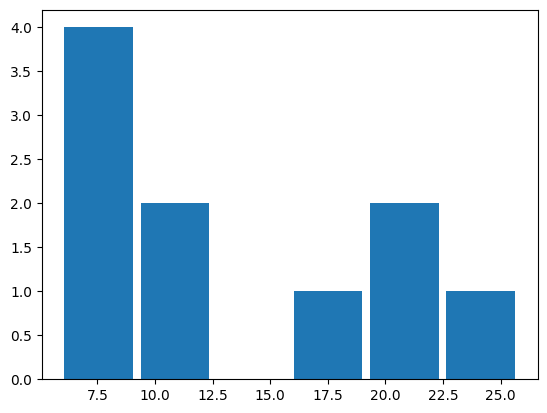

In [173]:
plt.hist(df['Ingreso en miles'], bins=6, rwidth=0.9)

Text(0.5, 1.0, 'Caso de estudio 1')

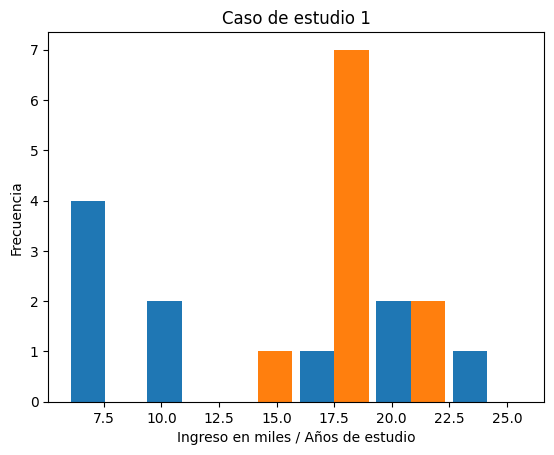

In [174]:
plt.hist(df, bins=6, rwidth=0.9)

plt.xlabel('Ingreso en miles / Años de estudio')
plt.ylabel('Frecuencia')
plt.title('Caso de estudio 1')

6) Calcula la media de 'Ingreso en miles' (df) utilizando pandas.

In [175]:
df['Ingreso en miles'].mean()

13.809999999999999

7) Calcula la media de 'Ingreso en miles' (array) utilizando numpy.

In [176]:
arr = df.to_numpy() # transformamos el dataframe en un numpy array
arr

array([[10.5, 17. ],
       [ 6.8, 18. ],
       [20.7, 21. ],
       [18.2, 16. ],
       [ 8.6, 16. ],
       [25.8, 21. ],
       [22.2, 16. ],
       [ 5.9, 14. ],
       [ 7.6, 18. ],
       [11.8, 18. ]])

In [177]:
ingreso_en_miles = arr[:,0] # creamos nuestro array 'Ingreso en miles' mediante slicing
# quiero todos los elementos que se encuentran dentro del corchete de mayor jerarquia( : ) y de
# cada uno de esos elementos voy a querer su primer elemento ( 0 )
ingreso_en_miles

array([10.5,  6.8, 20.7, 18.2,  8.6, 25.8, 22.2,  5.9,  7.6, 11.8])

In [178]:
ingreso_en_miles.mean() # uso el metodo mean() de Numpy para calcular promedio

13.809999999999999

8) Agregue los siguientes valores extremos al df \[ 50, 35 \], \[ 120, 30 \]. ¿En cuanto vario la media?, ¿Qué conclusiones obtiene de este resultado sobre la media?

In [179]:
a1 = pd.DataFrame({
    'Ingreso en miles': [50, 120],
    'Años de estudio': [35, 30]
})
a1

,Ingreso en miles,Años de estudio
0,50,35
1,120,30


In [192]:
new_df = pd.concat([df,a1])
new_df = new_df.reset_index(drop=True)
new_df


,Ingreso en miles,Años de estudio
0,10.5,17
1,6.8,18
2,20.7,21
3,18.2,16
4,8.6,16
5,25.8,21
6,22.2,16
7,5.9,14
8,7.6,18
9,11.8,18


In [194]:
# tambien podemos usar el parametro 'ignore_index' dentro del metodo ''concat'

new_df = pd.concat([df, a1], ignore_index=True)
new_df

,Ingreso en miles,Años de estudio
0,10.5,17
1,6.8,18
2,20.7,21
3,18.2,16
4,8.6,16
5,25.8,21
6,22.2,16
7,5.9,14
8,7.6,18
9,11.8,18
